## Task Rabbit Data Exercise
## Author: Nahian Jahangir

In [1]:
import csv 
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/Users/nahian/Desktop/TaskRabbit/sample.csv")

### Questions

#### 1) How many recommendation sets are in this data sample?

#### Answer

There are 2100 recommendation sets in this data sample.

#### Shown Work

In [3]:
# The total number of recommendation sets, found by grouping the sets by recommendation id and counting them all
number_of_recsets = len(dataset.groupby("recommendation_id").count())
print ("Total number of recommendation sets: ",number_of_recsets)

Total number of recommendation sets:  2100


#### 2) Each recommendation set shows from 1 to 15 Taskers, what is:

- average number of Taskers shown
- median  number of Taskers shown

#### Answer

The average number of Taskers per recommendation set is 14.29 (rounded to the nearest hundredths place). The median number of Taskers per recommendation set is 15.

#### Shown Work

In [4]:
# Unique recommendation sets with corresponding total number of tasker ids
recsets_by_taskers = dataset.groupby("recommendation_id").count()[["tasker_id"]]

In [5]:
# Total number of taskers shown across the recommendation sets
total_sum_taskers = recsets_by_taskers.agg(['sum']).at["sum", "tasker_id"]
# Average number of taskers shown per set
average_num_taskers = (total_sum_taskers/number_of_recsets)
print ("Average number of taskers shown: ", average_num_taskers)

Average number of taskers shown:  14.285714285714286


In [6]:
# Median number of taskers per set
median_num_taskers = recsets_by_taskers.agg(['median']).at["median", "tasker_id"]
print("Median number of taskers shown: ", median_num_taskers)

Median number of taskers shown:  15.0


#### 3) How many total unique Taskers are there in this data sample?

#### Answer
There are 830 unique taskers in the data sample.

#### Shown Work

In [7]:
# Number of unique taskers grouped by their id
num_unique_taskers = len(dataset.groupby("tasker_id").count())
print("Number of unique taskers: ", num_unique_taskers)

Number of unique taskers:  830


#### NOTE: For questions 4 and 5, I've written a small function to reuse for each solution below:

In [8]:
# This function returns with two lists of indices with the lowest/highest values of that dataset
# input: min_num: minimum number, max_num: maximum number, dataframe: a dataframe/dataset 
# output: min_list: list of indices with minimum value, max_list: list of indices with maximum value
def highs_and_lows(min_num, max_num, dataframe):
    min_list = []
    max_list = []
    for index, series in dataframe.iterrows():
        for value in series:
            if (value == min_num):
                min_list.append(index)
            if (value == max_num):
                max_list.append(index)   
    return (min_list, max_list)



#### 4) Which Tasker has been shown the most? Which Tasker has been shown the least?


#### Answer

List of tasker ID(s) with the most appearances: 

1014508755 

List of tasker ID(s) with the least appearances: 

1013934937, 1009618500, 1013731883, 1012151299, 1009612428, 1009994950, 1014439502, 1014478773, 1007480912, 1011901532, 1009712638, 1007472083, 1010021990, 1008368716, 1007383273, 1010042971, 1014310300, 1008919567, 1007638825, 1012071620, 1013854788, 1011972750, 1009754999, 1009772528, 1007923586, 1013830691, 1008033678, 1013656032, 1011985968, 1011968845, 1012805440, 1011957940, 1011952623, 1009871933, 1009641175, 1011949117, 1014086818, 1014547884, 1010009736, 1010779242, 1012678504, 1012289475, 1009547227, 1008469117, 1008870833, 1006899551, 1014926743, 1012166729, 1006853970, 1012364558, 1008828652, 1010640007, 1012386513, 1009461190, 1006690425, 1013362004, 1012348656, 1013573125, 1009702351, 1007246122, 1013573988, 1009112003, 1010681878, 1008474216, 1009603880, 1008604368, 1014593279, 1007295623

#### Shown Work

In [9]:
# Data subset of tasker ids with their corresponding number of recommendations
tasker_by_recsets = dataset.groupby("tasker_id").count()[["recommendation_id"]]

# The highest number of recommendations in the dataset (max = 608)
maximum_recs = tasker_by_recsets.agg(["max"]).at["max","recommendation_id"]

# The lowest number of recommendations in the dataset (min = 1)
minimum_recs = tasker_by_recsets.agg(["min"]).at["min","recommendation_id"]

# Here we find the taskers with the highest and lowest number of appearances in the data sample

# NOTE: Refer to helper function named "highs_and_lows" above
#
# Here we go through the data frame and access the tasker id and the corresponding number of recommendation 
# appearances. The first for loop separates the index (tasker ids) and the series (number of recs).
# The second for loop goes through the series and checks the value of each row to see if it is equivalent
# to the highest or lowest number of appearances. If so, it appends the tasker id to the corresponding list of
# lowest appearing/highest appearing taskers. 

lowest_highest_appearances = highs_and_lows(minimum_recs, maximum_recs, tasker_by_recsets)
print ("List of taskers with highest appearances: ", lowest_highest_appearances[1], "\n")
print ("List of taskers with lowest appearances: ", lowest_highest_appearances[0])

List of taskers with highest appearances:  [1014508755] 

List of taskers with lowest appearances:  [1006690425, 1006853970, 1006899551, 1007246122, 1007295623, 1007383273, 1007472083, 1007480912, 1007638825, 1007923586, 1008033678, 1008368716, 1008469117, 1008474216, 1008604368, 1008828652, 1008870833, 1008919567, 1009112003, 1009461190, 1009547227, 1009603880, 1009612428, 1009618500, 1009641175, 1009702351, 1009712638, 1009754999, 1009772528, 1009871933, 1009994950, 1010009736, 1010021990, 1010042971, 1010640007, 1010681878, 1010779242, 1011901532, 1011949117, 1011952623, 1011957940, 1011968845, 1011972750, 1011985968, 1012071620, 1012151299, 1012166729, 1012289475, 1012348656, 1012364558, 1012386513, 1012678504, 1012805440, 1013362004, 1013573125, 1013573988, 1013656032, 1013731883, 1013830691, 1013854788, 1013934937, 1014086818, 1014310300, 1014439502, 1014478773, 1014547884, 1014593279, 1014926743]


#### 5) Which Tasker has been hired the most? Which Tasker has been hired the least?

#### Answer

List of tasker ID(s) that were hired the most:

1014508755

List of tasker ID(s) that were hired the least:

1006646767, 1006655883, 1006690425, 1006702141, 1006720473, 1006751673, 1006771484, 1006797028, 1006808958, 1006853970, 1006899551, 1006912729, 1006997279, 1007007551, 1007030973, 1007062502, 1007079569, 1007084219, 1007099706, 1007184581, 1007227664, 1007246122, 1007281889, 1007295623, 1007298334, 1007306634, 1007330127, 1007341779, 1007359134, 1007383273, 1007387389, 1007427737, 1007434113, 1007472083, 1007472401, 1007500626, 1007507819, 1007522599, 1007558398, 1007559277, 1007587531, 1007622369, 1007635345, 1007637336, 1007638825, 1007667196, 1007668676, 1007669454, 1007676728, 1007690283, 1007698914, 1007737526, 1007759461, 1007767833, 1007802310, 1007833379, 1007835025, 1007857615, 1007864774, 1007923586, 1007951123, 1007959721, 1007968057, 1007979407, 1007983615, 1007996057, 1008009861, 1008033678, 1008040050, 1008048046, 1008084329, 1008084340, 1008100870, 1008117024, 1008126135, 1008156234, 1008160719, 1008181685, 1008204888, 1008226920, 1008246075, 1008285499, 1008291615, 1008315219, 1008368716, 1008388028, 1008433413, 1008437375, 1008469117, 1008471742, 1008474216, 1008515366, 1008522862, 1008530523, 1008541564, 1008575617, 1008579696, 1008604368, 1008627674, 1008638046, 1008733253, 1008755457, 1008770945, 1008793354, 1008795556, 1008828652, 1008851469, 1008852766, 1008869970, 1008870833, 1008882577, 1008882890, 1008887250, 1008909718, 1008916139, 1008917345, 1008919567, 1008923539, 1008927981, 1008929196, 1008937896, 1008992879, 1008993679, 1008994502, 1008998514, 1009004974, 1009010411, 1009012358, 1009015118, 1009017255, 1009018554, 1009032881, 1009060654, 1009068727, 1009068790, 1009069176, 1009082263, 1009088605, 1009095021, 1009101039, 1009102158, 1009104451, 1009112003, 1009173718, 1009175464, 1009194244, 1009198916, 1009200788, 1009207948, 1009214097, 1009238570, 1009252606, 1009257847, 1009263238, 1009275665, 1009303915, 1009324093, 1009346591, 1009370074, 1009383492, 1009415294, 1009437164, 1009442527, 1009461190, 1009498831, 1009521234, 1009522455, 1009522626, 1009527782, 1009533233, 1009546381, 1009547227, 1009557645, 1009560053, 1009562467, 1009574870, 1009584033, 1009588432, 1009592218, 1009599684, 1009602600, 1009603880, 1009609456, 1009612428, 1009614284, 1009617257, 1009618500, 1009624287, 1009628215, 1009641175, 1009641248, 1009650794, 1009655904, 1009664852, 1009671395, 1009676440, 1009678255, 1009684274, 1009691450, 1009698253, 1009699943, 1009702351, 1009703886, 1009710635, 1009711314, 1009712638, 1009754999, 1009770990, 1009772528, 1009773025, 1009775106, 1009846634, 1009849653, 1009871933, 1009912107, 1009915784, 1009971132, 1009994735, 1009994950, 1010005259, 1010007708, 1010009736, 1010021990, 1010042971, 1010073055, 1010118053, 1010123848, 1010160425, 1010197076, 1010207016, 1010213519, 1010256345, 1010283481, 1010336529, 1010339348, 1010353414, 1010358521, 1010359470, 1010364255, 1010401883, 1010409380, 1010431504, 1010454617, 1010472301, 1010504532, 1010536424, 1010539884, 1010559307, 1010566526, 1010572598, 1010578503, 1010615419, 1010620678, 1010623967, 1010630139, 1010640007, 1010662794, 1010681878, 1010749409, 1010777070, 1010779242, 1010780058, 1010800768, 1010808301, 1010825425, 1011878136, 1011888594, 1011892362, 1011893829, 1011895071, 1011895194, 1011895482, 1011901532, 1011911986, 1011916264, 1011918831, 1011920380, 1011924730, 1011925421, 1011926934, 1011934910, 1011939766, 1011945540, 1011948155, 1011949117, 1011950000, 1011952623, 1011954744, 1011955278, 1011957940, 1011967642, 1011968845, 1011971584, 1011972750, 1011977907, 1011980411, 1011983949, 1011998372, 1011998806, 1012008316, 1012012157, 1012014762, 1012015056, 1012023724, 1012032109, 1012037448, 1012041997, 1012043995, 1012044683, 1012070172, 1012071620, 1012087402, 1012092491, 1012098963, 1012109243, 1012124452, 1012137181, 1012151299, 1012156657, 1012161356, 1012162203, 1012164831, 1012166729, 1012177448, 1012185045, 1012203025, 1012256631, 1012263593, 1012278198, 1012283560, 1012287433, 1012288242, 1012289475, 1012294721, 1012295911, 1012300480, 1012310160, 1012314913, 1012334642, 1012336231, 1012348656, 1012349396, 1012350158, 1012359111, 1012361445, 1012364558, 1012366044, 1012370015, 1012386513, 1012665165, 1012671648, 1012673964, 1012674904, 1012678504, 1012695836, 1012697607, 1012701057, 1012713774, 1012714042, 1012721539, 1012723668, 1012734318, 1012739925, 1012742205, 1012768328, 1012772735, 1012782255, 1012794778, 1012802530, 1012805440, 1012808908, 1012817658, 1012827307, 1012833276, 1012844094, 1012844322, 1012852144, 1012855070, 1012863860, 1012882688, 1012897935, 1012901278, 1012904943, 1012921402, 1012934022, 1012940118, 1012943753, 1012993797, 1013015545, 1013018469, 1013050748, 1013054880, 1013118411, 1013147394, 1013154573, 1013157342, 1013180266, 1013232099, 1013274645, 1013283344, 1013307670, 1013310195, 1013324030, 1013332099, 1013347767, 1013348964, 1013356776, 1013360287, 1013362004, 1013393288, 1013404271, 1013408127, 1013428871, 1013443671, 1013456120, 1013466450, 1013470741, 1013471521, 1013488289, 1013518787, 1013535895, 1013536605, 1013547920, 1013559212, 1013565150, 1013569536, 1013573125, 1013573988, 1013579273, 1013579716, 1013581753, 1013584982, 1013597448, 1013601191, 1013605523, 1013611363, 1013616374, 1013629876, 1013639191, 1013640473, 1013643125, 1013656032, 1013680993, 1013712730, 1013731883, 1013735817, 1013739197, 1013750575, 1013763015, 1013774329, 1013785284, 1013791452, 1013796238, 1013808636, 1013810587, 1013817475, 1013827416, 1013830691, 1013841400, 1013854788, 1013889952, 1013905160, 1013930866, 1013934937, 1013936138, 1014040225, 1014086818, 1014093099, 1014100034, 1014134164, 1014149908, 1014153813, 1014230419, 1014240354, 1014261951, 1014273057, 1014295403, 1014305776, 1014310300, 1014333513, 1014380301, 1014410032, 1014427017, 1014437680, 1014439502, 1014439622, 1014501186, 1014502291, 1014532398, 1014539109, 1014547884, 1014551627, 1014571994, 1014578899, 1014586046, 1014593279, 1014632169, 1014640927, 1014657461, 1014659781, 1014667352, 1014697426, 1014710322, 1014753188, 1014753677, 1014788707, 1014790265, 1014820493, 1014860648, 1014866421, 1014881086, 1014901856, 1014917205, 1014926743, 1014928212, 1014983247, 1015000099, 1015000442


#### Shown Work

In [10]:
# Data subset of taskers with the corresponding number of times hired
taskers_by_hired = dataset.groupby("tasker_id").sum()[["hired"]]

# Maximum number of times taskers were hired (max = 59)
maximum_times_hired = taskers_by_hired.agg(["max"]).at["max","hired"]

# Minimum number of times taskers were hired (min = 1)
minimum_times_hired = taskers_by_hired.agg(["min"]).at["min","hired"]


# Here we find the taskers with the highest and lowest number of times hired in the data sample

# NOTE: Refer to helper function named "highs_and_lows" above
#
# Here we go through the data frame and access the tasker id and the corresponding times they were hired 
# The first for loop separates the index (tasker ids) and the series (number of times hired).
# The second for loop goes through the series and checks the value of each row to see if it is equivalent
# to the highest or lowest number of times hired. If so, it appends the tasker id to the corresponding list of
# lowest hired/highest hired taskers. 

lowest_highest_hired = highs_and_lows(minimum_times_hired, maximum_times_hired, taskers_by_hired)
print ("List of taskers with highest times hired: ", lowest_highest_hired[1], "\n")
print ("List of taskers with lowest times hired: ", lowest_highest_hired[0])

List of taskers with highest times hired:  [1012043028] 

List of taskers with lowest times hired:  [1006646767, 1006655883, 1006690425, 1006702141, 1006720473, 1006751673, 1006771484, 1006797028, 1006808958, 1006853970, 1006899551, 1006912729, 1006997279, 1007007551, 1007030973, 1007062502, 1007079569, 1007084219, 1007099706, 1007184581, 1007227664, 1007246122, 1007281889, 1007295623, 1007298334, 1007306634, 1007330127, 1007341779, 1007359134, 1007383273, 1007387389, 1007427737, 1007434113, 1007472083, 1007472401, 1007500626, 1007507819, 1007522599, 1007558398, 1007559277, 1007587531, 1007622369, 1007635345, 1007637336, 1007638825, 1007667196, 1007668676, 1007669454, 1007676728, 1007690283, 1007698914, 1007737526, 1007759461, 1007767833, 1007802310, 1007833379, 1007835025, 1007857615, 1007864774, 1007923586, 1007951123, 1007959721, 1007968057, 1007979407, 1007983615, 1007996057, 1008009861, 1008033678, 1008040050, 1008048046, 1008084329, 1008084340, 1008100870, 1008117024, 1008126135,

#### 6) If we define the "Tasker conversion rate" as the number of times a Tasker has been hired, out of the number of times the Tasker has been shown, how many Taskers have a conversion rate of 100%?

#### Answer
There are 6 taskers with a conversion rate of 100%.

#### Shown Work

In [11]:
# Data subset of tasker ids and the total number of times they were hired
tasker_times_hired = dataset.groupby("tasker_id").sum()[["hired"]]

# Data subset of tasker ids and the total number of times they were shown (times recommended)
tasker_times_seen = dataset.groupby("tasker_id").count()[["recommendation_id"]]

# A combined dataset of the earlier data subsets (tasker_times_hired & tasker_times_seen) joined by their tasker ids
combined_tasker_table = tasker_times_hired.join(tasker_times_seen, lsuffix='_tasker_times_hired', rsuffix='_tasker_times_seen')

# This following for loop creates a list of all the taskers who have a 100% conversion rate.
# The first for loop separates the index (tasker ids) and the series (number of times hired and shown).
# It then checks if the conversion rate is equivalent to 100%, or in this case, 1.0. If so, it appends 
# the tasker id to the list.
# The output is a list of the following : [tasker_id, times hired, times shown]

conversion_100_taskers = []
for tasker_id, data in combined_tasker_table.iterrows():
    if (((data.values[0]/data.values[1]).item()) == 1.0):
        conversion_100_taskers.append(["Tasker ID: " + str(tasker_id), "Times Hired: " + str(data.values[0]),
                                       "Times Shown: " + str(data.values[1])])
print (conversion_100_taskers)

[['Tasker ID: 1007480912', 'Times Hired: 1', 'Times Shown: 1'], ['Tasker ID: 1008094420', 'Times Hired: 2', 'Times Shown: 2'], ['Tasker ID: 1008861741', 'Times Hired: 9', 'Times Shown: 9'], ['Tasker ID: 1011985968', 'Times Hired: 1', 'Times Shown: 1'], ['Tasker ID: 1012369686', 'Times Hired: 2', 'Times Shown: 2'], ['Tasker ID: 1014478773', 'Times Hired: 1', 'Times Shown: 1']]


#### 7) Would it be possible for all Taskers to have a conversion rate of 100%? Please explain your reasoning.

#### Answer

Of the 830 unique tasker ids, only 6 have acquired a conversion rate of 100%. It is very unlikely to have all taskers achieve a conversion rate of 100%.

The data sample consists of 30,000 recommendations which suggest various tasker ids for different job categories. Within the dataset, there are 2,100 unique recommendation ids that contain up to 15 suggested taskers per recommendation set. The maximum number of taskers to be hired within each recommendation set is 1 while the minimum number is 0. This means that every time a tasker appears in a recommendation set, there is a large chance that they don't get hired. Due to the steep competition in every recommendation set, it is very unlikely that a tasker can get a conversion rate of a 100%. 

In order to improve the conversion rate of getting hired across all taskers shown, the following modifications can help:

- Decrease the amount of taskers per recommendation set, since at most only one tasker is hired. This raises the probability of taskers getting selected as there is less competition
- Increase the amount of taskers that can be hired per recommendation set.  This increases the success rate of each tasker
- Decrease the amount of taskers that fail to get hired at all. Currently, the number of taskers who fail to get hired is 518. If you can appropriately suggest taskers to recommendation sets where competition is less / their skills are better suited for the job, this can decrease the failure rate.

Applying these modifications can show a sizable improvement in the conversion rate.

#### Shown Work

In [12]:
# The values mentioned above were found with the following code:

# Number of people who achieved a 100% conversion rate
print("Number of Taskers with 100% conversion rate: ", len(conversion_100_taskers))

# Number of all recommendation sets (2100 sets)
print ("Number of all recommendation sets: ", number_of_recsets)

# Number of unique taskers (830)
print("Number of unique Taskers: ", num_unique_taskers)

# Number of taskers who did not get hired (518)
print ("Number of Taskers who failed to get hired: ", len(lowest_highest_hired[0]))

# Maximum/minimum number of people hired across recommendation sets (between 1 and 0)
print("Data subset of max/min number of people hired across recommendation sets:\n")
print(dataset.groupby("recommendation_id").sum()[["hired"]].agg(["max", "min"]))

Number of Taskers with 100% conversion rate:  6
Number of all recommendation sets:  2100
Number of unique Taskers:  830
Number of Taskers who failed to get hired:  518
Data subset of max/min number of people hired across recommendation sets:

     hired
max      1
min      0


#### 8) For each category, what is the average position of the Tasker who is hired?


#### Answer

These are the average positions of the Taskers that are ultimately hired for each category (rounded to the nearest hundredths place):

- Furniture Assembly: 3.61
- Mounting: 4.60
- Moving Help: 4.15

#### Shown Work

In [13]:
dataset.loc[dataset['hired'].isin([1])].groupby("category")[["position"]].mean()

,position
category,
Furniture Assembly,3.611888
Mounting,4.596085
Moving Help,4.145359


#### 9) For each category, what is the average hourly rate and average number of completed tasks for the Taskers who are hired?

#### Answer

These are the average hourly rates of Taskers hired for each category (rounded to the nearest hundredths place):

- Furniture Assembly: 38.70
- Mounting: 50.15
- Moving Help: 63.01

These are the average number of completed tasks by Taskers hired for each category (rounded to the nearest hundredths place):

- Furniture Assembly: 249.02
- Mounting: 284.09
- Moving Help: 273.88


#### Shown Work

In [14]:
dataset.loc[dataset['hired'].isin([1])].groupby("category")[["hourly_rate", "num_completed_tasks"]].mean()

,hourly_rate,num_completed_tasks
category,,
Furniture Assembly,38.701049,249.020979
Mounting,50.154804,284.096085
Moving Help,63.012259,273.882662


10) Based on the previous, how would you approach the question of:

How can we use market data to suggest hourly rates to Taskers that would maximize their opportunity to be hired?

Please describe in detail, with code and formulas that support your model.

#### Answer

#### Hypothesis

Using the market data extracted from the data sample provided, I believe that evaluating the relationship between the hourly rates of hired Taskers and their average number of tasks completed would reveal a mathematical formula or model that can aid in determining hourly rates. I hypothesize that the relationship between the number of completed tasks and the hourly rate is linear, meaning that those with more completed tasks under their profile can charge higher hourly rates for their services. To prove my hypothesis, I plan to:

- Create a subset from the data sample provided to include only successfully hired taskers and the attributes of "category", "hourly_rate", and "num_completed_tasks". I will then transform this data set by finding the average number of completed tasks per unique hourly rate charged.
- Split the subset into three groups based on the 3 different categories: Furniture Assembly, Moving Help, and Mounting
- Apply a linear regression model to each dataset to see whether or not the relationship between hourly rate and previous completed number of tasks is linear

Next, I will be discussing the steps I've taken during my analysis:

#### Methods

The first step is to create a new dataset from the original data sample and transform it. Here we make sure to include successfully hired taskers and also include the attributes "category", "hourly_rate", and "num_completed_tasks." We then transform the data to find the average number of completed tasks per unique hourly rate charge. 

This dataset is labeled "hired_categories" and is shown below:

In [15]:
# Hired people's category and the average num_completed_tasks for each hourly rate 
hired_categories = dataset.loc[dataset['hired'].isin([1])][["category","hourly_rate","num_completed_tasks"]].groupby(["category", "hourly_rate"]).mean().sort_values(by=["category","hourly_rate"])
hired_categories = hired_categories.reset_index(level='hourly_rate')
hired_categories


,hourly_rate,num_completed_tasks
category,,
Furniture Assembly,22,6.600000
Furniture Assembly,25,25.200000
Furniture Assembly,26,38.920000
Furniture Assembly,27,6.400000
Furniture Assembly,28,28.307692
Furniture Assembly,29,31.000000
Furniture Assembly,30,54.312500
Furniture Assembly,31,56.833333
Furniture Assembly,32,37.200000


Since we are working with three different categories, I've split the dataset, which was previously labeled "hired_categories", into three subsets: Furniture Assembly, Moving Help, and Mounting. 

The three datasets are labeled "furniture_assembly", "mounting", and "moving_help", and are shown below: 

In [16]:
furniture_assembly = hired_categories.loc["Furniture Assembly"]
mounting = hired_categories.loc["Mounting"]
moving_help = hired_categories.loc["Moving Help"]

The next step is to apply a linear regression model to each subset. Using the package statsmodels, I've opted to use OLS (Ordinary Least Squares) method to test out my hypothesis. I use OLS for the following reasons:

- I believe that the relationship between number of completed tasks and the hourly rate is linear
- I believe that the data sample is a true random sampling of taskers across the three different markets
- I hold one independent variable (number of completed tasks) to inform the value of hourly rate, so there is no multi-collinearity 
- I believe that the dataset is homoscedastic, or that all the random variables have the same variance
- I believe that the conditional mean is 0, or that I assume there are no other variables that can come into play

I apply the models for each subset and print the results below:

#### Data

In [17]:
fa_model = sm.ols(formula = "hourly_rate ~ num_completed_tasks", data = furniture_assembly).fit()
print("Furniture Assembly - OLS\n", fa_model.summary(), "\n")
mou_model = sm.ols(formula = "hourly_rate ~ num_completed_tasks", data = mounting).fit()
print("Mounting - OLS\n", mou_model.summary(), "\n")
mh_model = sm.ols(formula = "hourly_rate ~ num_completed_tasks", data = moving_help).fit()
print("Moving Help - OLS\n", mh_model.summary(), "\n")


Furniture Assembly - OLS
                             OLS Regression Results                            
Dep. Variable:            hourly_rate   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     32.01
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.82e-06
Time:                        16:56:38   Log-Likelihood:                -178.27
No. Observations:                  39   AIC:                             360.5
Df Residuals:                      37   BIC:                             363.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercep

#### Analysis

The simplest way to determine a linear relationship between an independent and a dependent variable is to use the following linear regression formula:

Y = mx + b (+/-) a where:

- Y represents the hourly rate, the dependent variable
- m represents the slope
- x represents the number of completed tasks, the independent variable
- b represents the intercept
- a represents the error term, the standard deviation

Formulas:

(Furniture Assembly) hourly_rate = 0.0816(num_completed_tasks) + 29.4995 (+/-) 5.637

(Mounting) hourly_rate = 0.0403(num_completed_tasks) + 41.0251 (+/-) 3.230

(Moving Help) hourly_rate = 0.0979(num_completed_tasks) + 42.3594 (+/-) 7.190


Using the furniture assembly formula, we can perform a simple check by plugging in a number of completed tasks for a selected row in the data points. For example:

A Tasker whose hourly rate is $36 has an average of 150.285714 number of tasks completed. Plugging in our values results in:

Y = .0816(150.285714) + 29.4995 (+/-) 5.637

Y = 41.7628143 - 5.637

Y = 36.1258143

Y ~ 36, which is approximately the hourly rate we were expecting, and verifies that this formula leads us to the proper approximation.


From the OLS data results above, the most significant outcome is the R-Squared value across the three categories. The R-squared value tells us how close we are in fitting our data to the regression line. This value across the categories is as follows:

- Furniture Assembly: 0.464
- Mounting: 0.385
- Moving Help: 0.419

To explain what this means further, I'll use our results from Furniture Assembly. Our R-squared value was .464 which means that our statistical model helps to explain 46.4% of our data. However, it leaves 53.6% of the data unexplained with this linear regression model. The R-squared values across the other categories are also quite low. In conclusion, though there is a slight correlation, the relationship between completed number of tasks and hourly rate does not appear to be entirely linear. 

#### Discussion

There are several ways of improving this experiment when deriving a better mathematical predictor for hourly rates in the future.

For starters, there may be other variables that come into play when hiring a tasker. Though number of tasks completed is a good indicator for how experienced a tasker can be, we must also consider their quality of work, their customer feedback, and how well they market themselves. These factors can make a huge impact on whether an individual gets hired for a task or not.

Another part of the experiment that can be improved upon is increasing the sample number. After transforming and altering the datasets several times, I was left with between 30-45 observations per applied statistical model. By increasing the sample size, we can get a more accurate idea of whether or not our applied model is the right one.

Lastly, I made incorrect assumptions that made up my reasoning to use the OLS method for my linear regression. One such assumption was believing that the data I had was homoscedastic, or that my variables had the same level of variance between each other. However, by simply plotting the "furniture_assembly" dataset, we can see that variance fluctuated quite a bit between the scattered points, as shown below:

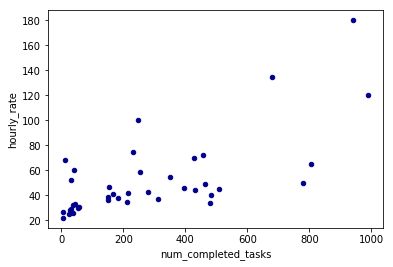

In [18]:
furniture_assembly.plot.scatter(x='num_completed_tasks',y='hourly_rate', c='DarkBlue')
plt.show()

#### Conslusion

In conclusion, using our current data sample we cannot generate an informed method for determining hourly rates that would help Taskers improve their job acquisition success rate. 

However, as mentioned above, there are a number of ways we can further improve the analysis:

- Gather a larger data sampling to improve accuracy of results
- Consider and include other factors, such as quality of work or Tasker rating
- Apply different mathematical models or methods

While this is not an indepth analysis, I do believe that I was able to show that a correlation exists between the hourly rate and the number of completed tasks.